In [28]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import sunpy.map
from sunpy.net import Fido, attrs as a

import eispac.core

In [2]:
m_195 = sunpy.map.Map('../data/noaa_11944/EIS/level_2/eis_20140108_095727.fe_12_195_119.2c-0.int.fits')

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


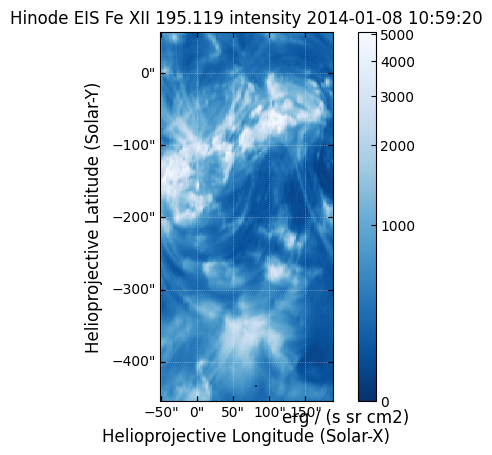

In [3]:
m_195.peek()

In [4]:
m_long = sunpy.map.Map('../data/noaa_11944/EIS/level_2/eis_20140108_095727.fe_16_262_984.1c-0.int.fits')

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


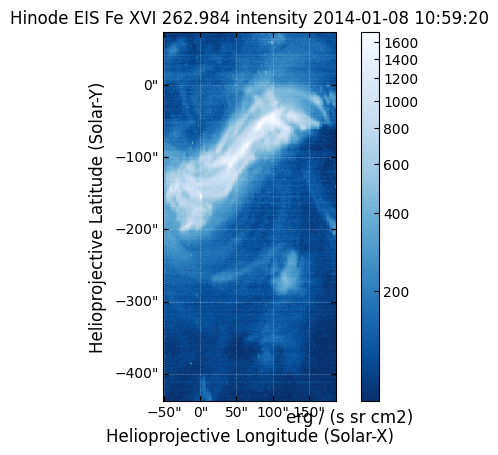

In [5]:
m_long.peek(clip_interval=(1,99.9)*u.percent)

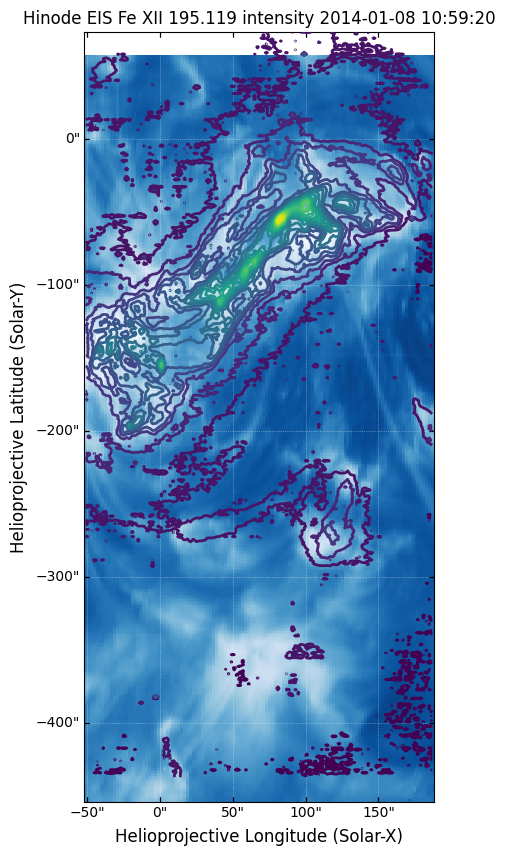

In [8]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(projection=m_195)
m_195.plot(axes=ax)
m_long.draw_contours(np.linspace(1,100,20)*u.percent, axes=ax)

In [16]:
m_long_repr = m_long.reproject_to(m_195.wcs)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


In [18]:
m_long_repr.meta

MetaDict([('wcsaxes': '2')
('crpix1': '1.0')
('crpix2': '1.0')
('cdelt1': '0.00055466666666667')
('cdelt2': '0.00027777777777778')
('cunit1': 'deg')
('cunit2': 'deg')
('ctype1': 'HPLN-TAN')
('ctype2': 'HPLT-TAN')
('crval1': '-0.014102176560296')
('crval2': '-0.12617215474447')
('lonpole': '180.0')
('latpole': '-0.12617215474447')
('mjdref': '0.0')
('date-obs': '2014-01-08T10:59:20.500')
('mjd-obs': '56665.457876157')
('rsun_ref': '695700000.0')
('dsun_obs': '147109797267.36')
('hgln_obs': '0.0')
('hglt_obs': '-3.845740370569')])

In [19]:
m_long.meta
update_keys = [
    'telescop',
    'instrume',
    'line_id',
    'measrmnt',
    'bunit',
    # explicitly set the dates to be the same as those from the Fe XII 195 file
]

MetaDict([('simple': 'True')
('bitpix': '-64')
('naxis': '2')
('naxis1': '120')
('naxis2': '512')
('extend': 'True')
('date_obs': '2014-01-08T09:57:27.000')
('date_beg': '2014-01-08T09:57:27.000')
('date_avg': '2014-01-08T10:59:20.500')
('date_end': '2014-01-08T12:01:14.000')
('timesys': 'UTC')
('telescop': 'Hinode')
('instrume': 'EIS')
('stud_acr': 'HPW021_VEL_240x512v1')
('obstitle': 'Active Region Studies - Test for Upcoming "Focus Mode" observations&')
('target': 'Active Region')
('sci_obj': 'AR                                                                 &')
('line_id': 'Fe XVI 262.984')
('measrmnt': 'intensity')
('bunit': 'erg / (s sr cm2)')
('slit_id': '1"')
('slit_ind': '0')
('nraster': '120')
('cname1': 'Solar-X')
('crval1': '-50.76783561706543')
('crpix1': '1')
('cdelt1': '1.9968')
('ctype1': 'HPLN-TAN')
('cunit1': 'arcsec')
('cname2': 'Solar-Y')
('crval2': '-437.48486328125')
('crpix2': '1')
('cdelt2': '1.0')
('ctype2': 'HPLT-TAN')
('cunit2': 'arcsec')
('fovx': '239.61599

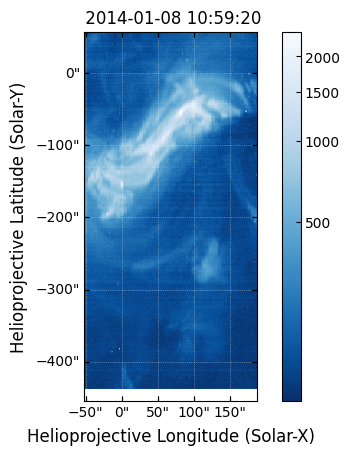

In [17]:
m_long_repr.peek()

In [9]:
m_long.reference_coordinate.Ty

<Latitude -437.48486328 arcsec>

In [10]:
m_195.reference_coordinate.Ty

<Latitude -454.21975708 arcsec>

In [11]:
from eispac.instr import ccd_offset

In [12]:
ccd_offset(m_long.wavelength) - ccd_offset(m_195.wavelength)

<Quantity [-16.73582] pix>

In [15]:
(m_long.reference_coordinate.Ty - m_195.reference_coordinate.Ty) / m_long.scale.axis2

<Quantity 16.7348938 pix>

array([[[181.77535672, 181.79765586, 181.81995497, ..., 182.42202129,
         182.44431969, 182.46661806],
        [181.77440511, 181.79670425, 181.81900335, ..., 182.42106968,
         182.44336808, 182.46566645],
        [181.7733925 , 181.79569164, 181.81799075, ..., 182.42005707,
         182.44235547, 182.46465384],
        ...,
        [181.75631472, 181.77861386, 181.80091296, ..., 182.40297929,
         182.42527769, 182.44757606],
        [181.7561018 , 181.77840093, 181.80070004, ..., 182.40276637,
         182.42506476, 182.44736314],
        [181.75597206, 181.7782712 , 181.8005703 , ..., 182.40263663,
         182.42493503, 182.4472334 ]],

       [[181.77531695, 181.79761608, 181.81991519, ..., 182.42198152,
         182.44427992, 182.46657829],
        [181.77436534, 181.79666447, 181.81896358, ..., 182.42102991,
         182.4433283 , 182.46562668],
        [181.77335273, 181.79565186, 181.81795097, ..., 182.4200173 ,
         182.4423157 , 182.46461407],
        ...,


In [29]:
Fido.search(
    a.Time(m_195.date_start, m_195.date_end, near=m_195.date_average),
    a.Instrument.xrt
)

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent X,Extent Y,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str6,str3,float64[2],str3,str9,str5,str10,str9,str8,float64
2014-01-09 06:03:03.150,2014-01-09 06:03:03.155,Hinode,XRT,3.0 .. 300.0,SAO,Intensity,Broad,-21.525526,-9.003398,FULLDISK,4114.6875


In [31]:
m_195.date_average

<Time object: scale='utc' format='isot' value=2014-01-08T10:59:20.500>